
# Loan Application Status Prediction

## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming and Calling the dataset as dataframe

In [2]:
df=pd.read_csv('Loan_application_dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

- The dataframe has 614 rows and 13 columns.

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- The dataset has 8 column's values as object type and 4 colum's as float and 1 column as integer type data.

In [5]:
df.columns # column names of the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Checking for null- values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- The dataset has null-values in 7 columns.

In [7]:
df.duplicated().sum()

0

- There are no duplicated values.

In [8]:
[df['Loan_Status']==" "]

[0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 609    False
 610    False
 611    False
 612    False
 613    False
 Name: Loan_Status, Length: 614, dtype: bool]

- There are no values with spacing.

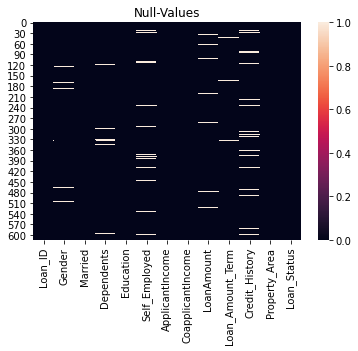

In [9]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

  - There are no null-values in the dataset.

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

- There are no duplicated values.

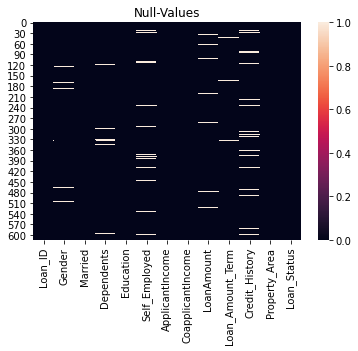

In [11]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

- Null-values are present & can be seen in the heatmap of the dataset.

### Checking for mis-interpreted values :-

In [12]:
df
for c in df:
    print(c)
    print(df[c].value_counts())

Loan_ID
LP001693    1
LP002877    1
LP002659    1
LP001164    1
LP002833    1
           ..
LP002841    1
LP002804    1
LP001179    1
LP001032    1
LP002262    1
Name: Loan_ID, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount
120.0    20
110.0    17
100.0    15


- There seems no mis-interpreted data.

In [13]:
df['Dependents']=df['Dependents'].replace(to_replace='3+',value=4)  # changing 3+ from string type to numerical

### Handling the null- values

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [15]:
df.info() # cross-checking , there are no-null values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df['ApplicantIncome']=df['ApplicantIncome'].astype(float) # making data uniform in float form

In [17]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

- The target variables have 2 types of result 'Y' and 'N'.Thus it is a classification regression machine learning problem.

In [18]:
df.describe() # numerical data only

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [19]:
df_categorical=df.select_dtypes(include=['object']).keys()
df_categorical

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df_numerical=df.select_dtypes(include=['float64']).keys()
df_numerical

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Visualisation of Categorical  data :-

<AxesSubplot:xlabel='Gender', ylabel='count'>

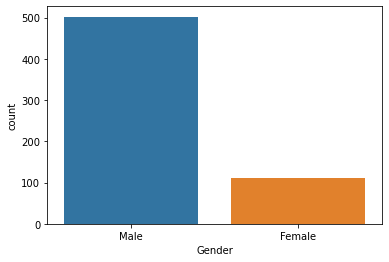

In [21]:
sns.countplot(df['Gender'])

- Number of males is more than half of the total people in the record.

<AxesSubplot:xlabel='Married', ylabel='count'>

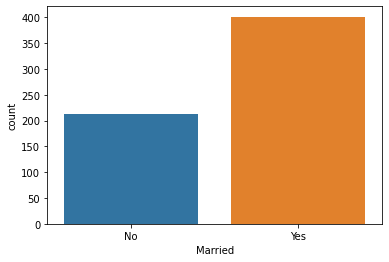

In [23]:
sns.countplot(df['Married'])

- The no of people is higher than unmarried.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

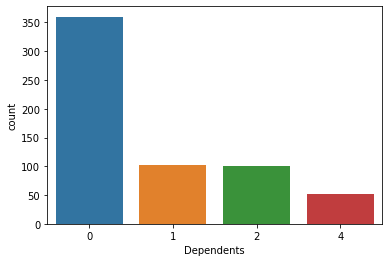

In [24]:
sns.countplot(df['Dependents'])

- More than half of the people from the record are not having dependents on them.
- People having 1 or 2 dependents is almost same.
- People having more than 3 dependents is least in the record.

<AxesSubplot:xlabel='Education', ylabel='count'>

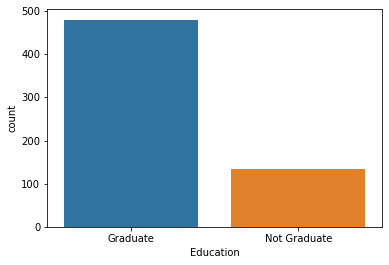

In [25]:
sns.countplot(df['Education'])

- Graduate people are more in the record.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

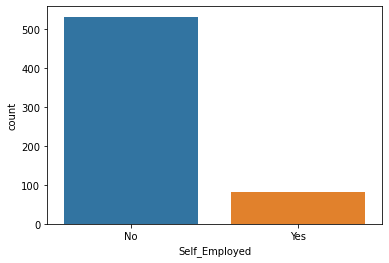

In [26]:
sns.countplot(df['Self_Employed'])

- 20 % of the people are self-employed in the record.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

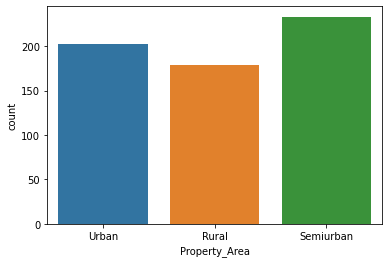

In [27]:
sns.countplot(df['Property_Area'])

- People from Semiurban is highest in the record.
- People from rural is least in the record.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

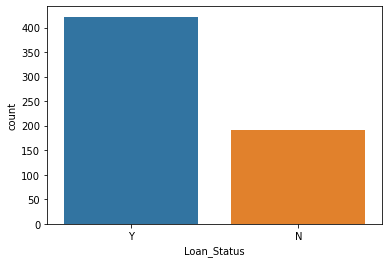

In [28]:
sns.countplot(df['Loan_Status'])

- The people who got approval for loan as Yes is higher than that of no.

## Visualisation of Numerical data :-

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

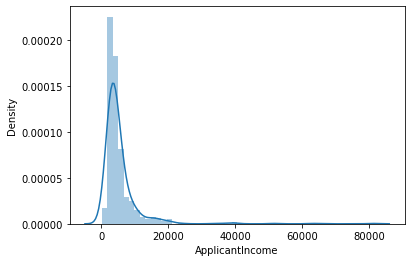

In [29]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

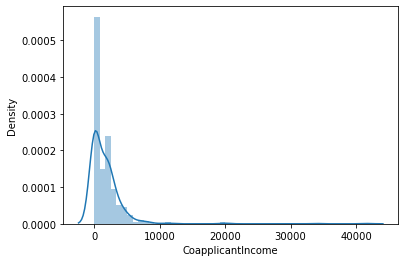

In [30]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

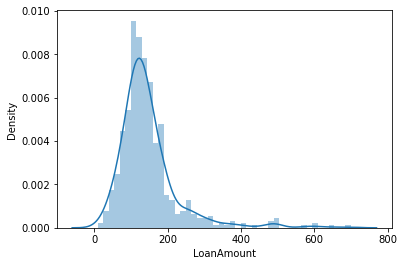

In [31]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

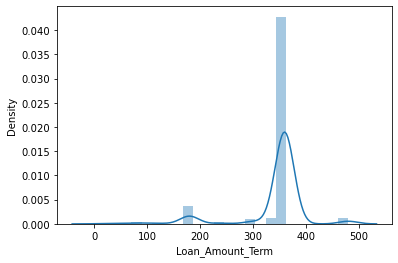

In [32]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

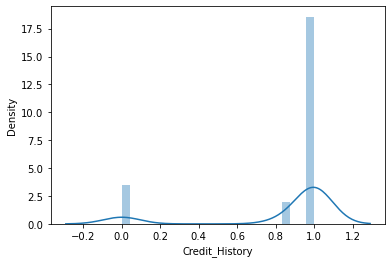

In [33]:
sns.distplot(df['Credit_History'])

<AxesSubplot:xlabel='ApplicationIncomeLog', ylabel='Density'>

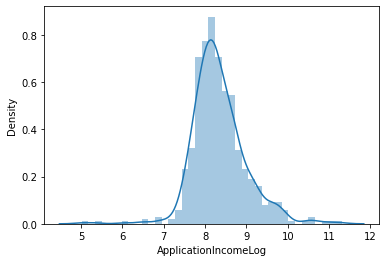

In [34]:
df['Total_Income'] =df['ApplicantIncome'] + df['CoapplicantIncome']

df['ApplicationIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicationIncomeLog"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

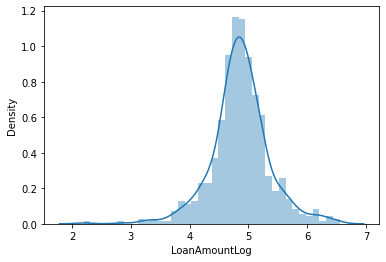

In [35]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

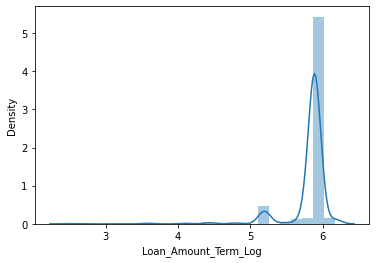

In [36]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

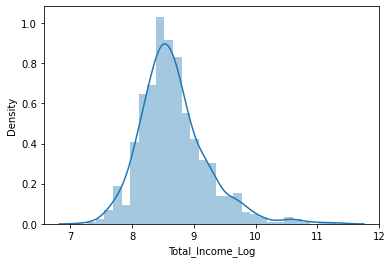

In [37]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Total_Income'}>],
       [<AxesSubplot:title={'center':'ApplicationIncomeLog'}>,
        <AxesSubplot:title={'center':'LoanAmountLog'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term_Log'}>],
       [<AxesSubplot:title={'center':'Total_Income_Log'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

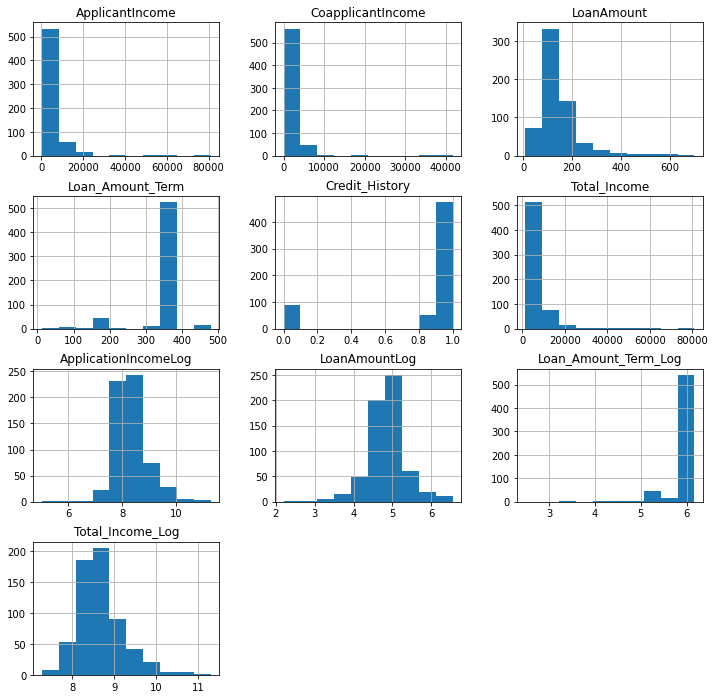

In [38]:
df.hist(figsize=(12,12),sharex=False)

ApplicantIncome            AxesSubplot(0.125,0.125;0.065678x0.755)
CoapplicantIncome       AxesSubplot(0.203814,0.125;0.065678x0.755)
LoanAmount              AxesSubplot(0.282627,0.125;0.065678x0.755)
Loan_Amount_Term        AxesSubplot(0.361441,0.125;0.065678x0.755)
Credit_History          AxesSubplot(0.440254,0.125;0.065678x0.755)
Total_Income            AxesSubplot(0.519068,0.125;0.065678x0.755)
ApplicationIncomeLog    AxesSubplot(0.597881,0.125;0.065678x0.755)
LoanAmountLog           AxesSubplot(0.676695,0.125;0.065678x0.755)
Loan_Amount_Term_Log    AxesSubplot(0.755508,0.125;0.065678x0.755)
Total_Income_Log        AxesSubplot(0.834322,0.125;0.065678x0.755)
dtype: object

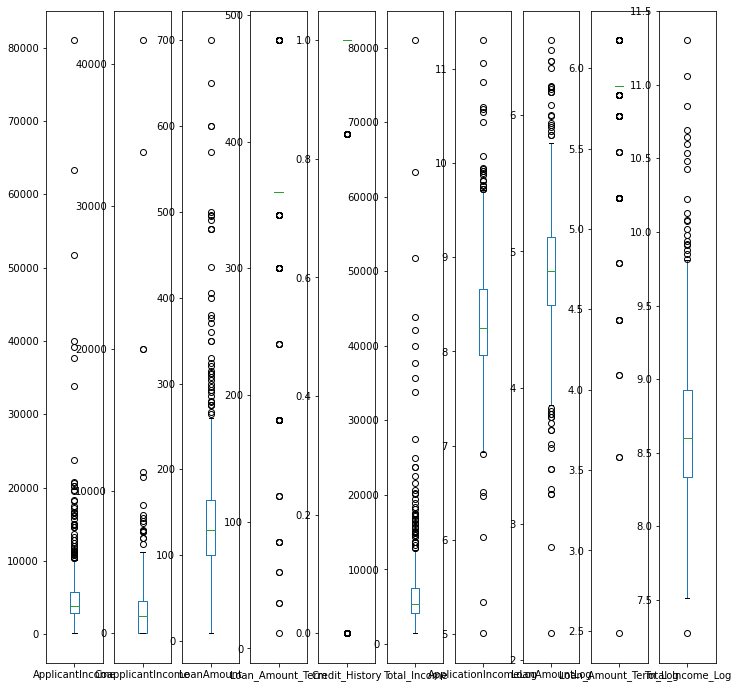

In [39]:
df.plot(kind='box',figsize=(12,12),sharex=False,subplots=True)

- Large number of outliers present are seen in boxplot graph.

## Mulit-Variate Analysis :-

<AxesSubplot:>

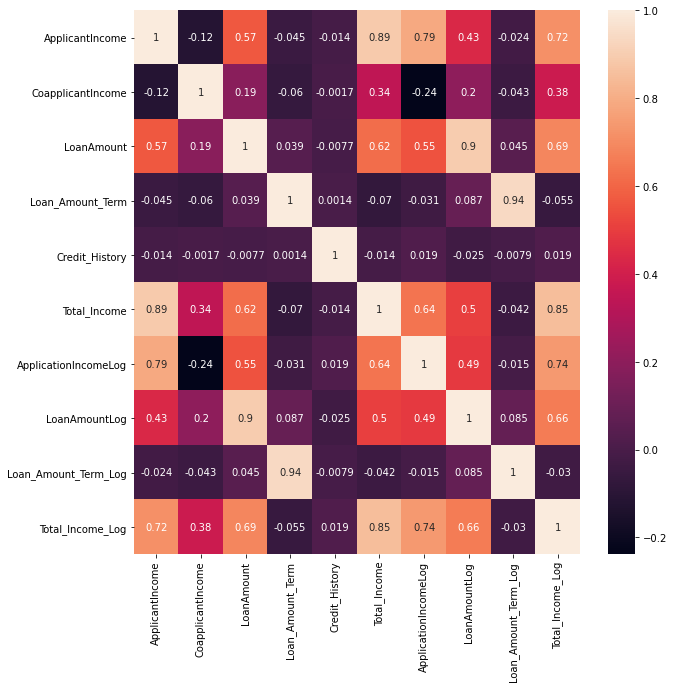

In [40]:
corr =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot= True)

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104,8.699515


## Label Encoding¶


In [42]:
from sklearn.preprocessing import LabelEncoder
columns= ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le =LabelEncoder()
for col in columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,1,0,0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1,5849.0,8.674026,4.986426,5.886104,8.674026
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,6091.0,8.430109,4.852030,5.886104,8.714568
2,LP001005,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1,3000.0,8.006368,4.189655,5.886104,8.006368
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,4941.0,7.856707,4.787492,5.886104,8.505323
4,LP001008,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1,6000.0,8.699515,4.948760,5.886104,8.699515


In [43]:
df=df.drop('Loan_ID',axis=1)

### Seperating target variable :- 

In [44]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

### Checking the skewness

In [45]:
x.skew()

Gender                 -1.648795
Married                -0.644850
Dependents              1.456965
Education               1.367622
Self_Employed           2.159796
ApplicantIncome         6.539513
CoapplicantIncome       7.491531
LoanAmount              2.726601
Loan_Amount_Term       -2.389680
Credit_History         -1.963600
Property_Area          -0.066196
Total_Income            5.633449
ApplicationIncomeLog    0.479580
LoanAmountLog          -0.223227
Loan_Amount_Term_Log   -4.868293
Total_Income_Log        1.076702
dtype: float64

keeping +/- 0.5 as the range for skeness.

### Handling the skewness

In [46]:
from sklearn.preprocessing import power_transform
df=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)
df.skew()

Gender                 -1.648795
Married                -0.644850
Dependents              0.462789
Education               1.367622
Self_Employed           2.159796
ApplicantIncome        -0.092946
CoapplicantIncome      -0.145646
LoanAmount              0.024376
Loan_Amount_Term        0.389827
Credit_History         -1.599912
Property_Area          -0.158267
Total_Income            0.000000
ApplicationIncomeLog    0.030663
LoanAmountLog           0.110538
Loan_Amount_Term_Log    0.270531
Total_Income_Log       -0.035345
dtype: float64

### Handling the outliers :-

In [47]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence

## Feature Selection¶

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [49]:
selector.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [50]:
feature_imp = selector.feature_importances_

In [51]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 1.88
1 1.93
2 4.15
3 1.84
4 1.88
5 7.39
6 6.32
7 7.08
8 2.64
9 29.21
10 3.85
11 7.43
12 7.06
13 7.47
14 2.5
15 7.39


In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,0.472343,-1.372089,-0.824302,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.514063,1.193567,0.0,0.536017,0.229733,0.191058,0.144308
1,0.472343,0.728816,0.831605,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.514063,-1.350003,0.0,0.162466,-0.044151,0.191058,0.222413
2,0.472343,0.728816,-0.824302,-0.528362,-0.392601,-0.499955,-1.102837,-1.346305,0.185905,0.514063,1.193567,0.0,-0.503251,-1.342458,0.191058,-1.406893
3,0.472343,0.728816,-0.824302,-0.528362,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.514063,1.193567,0.0,-0.743725,-0.174440,0.191058,-0.198464
4,0.472343,-1.372089,-0.824302,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.514063,1.193567,0.0,0.574662,0.152625,0.191058,0.193599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.472343,-1.372089,-0.824302,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.514063,-1.350003,0.0,-0.557472,-1.203608,0.191058,-1.501223
610,0.472343,0.728816,1.603926,-0.528362,-0.392601,-0.000290,-1.102837,-2.034996,0.185905,0.514063,-1.350003,0.0,-0.008110,-2.042607,0.191058,-0.610326
611,0.472343,0.728816,0.831605,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.514063,1.193567,0.0,1.019167,1.379582,0.191058,0.771829
612,0.472343,0.728816,1.288364,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.514063,1.193567,0.0,0.926317,0.737194,0.191058,0.618266


## Normalisation

In [53]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import f1_score

In [54]:
x=x.drop(['ApplicantIncome', 'CoapplicantIncome',"LoanAmount","Loan_Amount_Term","Total_Income","Dependents"], axis=1)

## Checking & handling class-imbalance in target variable :-


In [55]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    68.73 %
0    31.27 %
Name: Loan_Status, dtype: object

- The target varibale is imbalanced.

In [56]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [57]:
ros = RandomOverSampler(random_state=42)

In [58]:
x_resampled,y_resampled=ros.fit_resample(x,y)

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
maxAccuracy=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predrf=lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccuracy:
        macAccuracy=acc
        maxRS=i
print('The best accuracy is', maxAccuracy,' on Random state',maxRS)

The best accuracy is 0  on Random state 99


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=99)

In [61]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (675, 10)
x_test shape: (169, 10)
y_train shape: (675,)
y_test shape: (169,)


## Logistic Regression Model :-

In [62]:
from sklearn.linear_model import LogisticRegression
ln= LogisticRegression(random_state=99)
ln.fit(x_train,y_train)
y_pred_ln=ln.predict(x_test)

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_ln) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_ln) * 100, 2))

Logistic Regression:
Accuracy score: 68.64
F1 score: 73.63


## Random Forest Classifier Model :-

In [63]:
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier(random_state=42)
rdf.fit(x_train,y_train)
y_pred_rdf=rdf.predict(x_test)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rdf) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rdf) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.62
F1 score: 83.75


## Decision Tree Classifier model testing -



In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[90  0]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        79

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



## Nearest Neighbors Classifier model testing -


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

0.7337278106508875
[[73 17]
 [28 51]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        90
           1       0.75      0.65      0.69        79

    accuracy                           0.73       169
   macro avg       0.74      0.73      0.73       169
weighted avg       0.74      0.73      0.73       169



In [66]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [67]:
kneighbors(3)

0.7633136094674556
[[70 20]
 [20 59]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        90
           1       0.75      0.75      0.75        79

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169



In [68]:
kneighbors(4)

0.7337278106508875
[[73 17]
 [28 51]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        90
           1       0.75      0.65      0.69        79

    accuracy                           0.73       169
   macro avg       0.74      0.73      0.73       169
weighted avg       0.74      0.73      0.73       169



In [69]:
kneighbors(5)

0.7159763313609467
[[62 28]
 [20 59]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        90
           1       0.68      0.75      0.71        79

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.72       169
weighted avg       0.72      0.72      0.72       169



In [70]:
kneighbors(6)

0.7100591715976331
[[65 25]
 [24 55]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73        90
           1       0.69      0.70      0.69        79

    accuracy                           0.71       169
   macro avg       0.71      0.71      0.71       169
weighted avg       0.71      0.71      0.71       169



## Cross-Validation score for each model :-

In [120]:
from sklearn.model_selection import cross_val_score

In [129]:
0.7337278106508875-0.7068372650939624

0.02689054555692516

In [122]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for LogisticRegression model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :67.92015460482473.')

The cross validation score for LogisticRegression model is : 0.716620018659203
The difference between accuracy and crossvalidation score is :67.92015460482473.


In [125]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for Random Forest Classifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :83.90664534186325.')

The cross validation score for Random Forest Classifier model is : 0.7149940023990403
The difference between accuracy and crossvalidation score is :83.90664534186325.


In [128]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.2671064907370386.')

The cross validation score for DecisionTreeClassifier model is : 0.7133813141410101
The difference between accuracy and crossvalidation score is :0.2671064907370386.


In [130]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for Kneighbors model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is :0.02689054555692516.')

The cross validation score for Kneighbors model is : 0.7247500999600159
The difference between accuracy and crossvalidation score is :0.02689054555692516.


## Hyperparameter Tuning¶



In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [95]:
param_dist = {'n_estimators': n_estimators,'max_depth': max_depth,}

In [96]:
rf_tuned = RandomForestClassifier(random_state=99)

In [97]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [98]:
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [99]:
rf_cv.best_score_

0.8622222222222223

In [100]:
rf_cv.best_params_

{'n_estimators': 126, 'max_depth': 79}

In [101]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=99)

In [102]:
rf_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=99)

In [103]:
y_pred_rf_best = rf_best.predict(x_test)

In [104]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(y_test, y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 84.02
F1 score: 83.23


In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf_best)

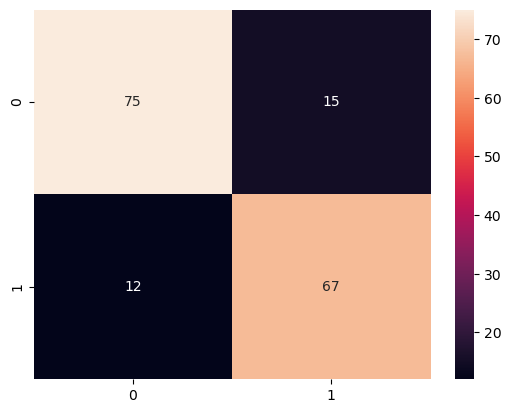

In [106]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d')
plt.savefig('heatmap.png')
plt.show()

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        90
           1       0.82      0.85      0.83        79

    accuracy                           0.84       169
   macro avg       0.84      0.84      0.84       169
weighted avg       0.84      0.84      0.84       169



## Saving the model¶

In [118]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open('pickledtcfile','wb'))

In [119]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])